<a href="https://colab.research.google.com/github/inyunita/image-processing/blob/main/Color_Extraction_dan_GLCM_1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path untuk sample image
path = ('drive/MyDrive/Jagung All/Bulai_1000/')

In [ ]:
image = cv2.imread(path+'Bulai_1 (10).png')
image = cv2.resize(image,(200,300))

In [ ]:
img = image.astype(np.float64)/255.
K = 1 - np.max(img, axis=2)
C = (1-img[...,2] - K)/(1-K) #(1-R-K)/(1-k)
M = (1-img[...,1] - K)/(1-K) # (1-G-K)/(1-k)
Y = (1-img[...,0] - K)/(1-K) #(1-B-K)/(1-k)
CMYK_image= (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

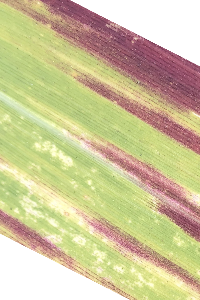

In [ ]:
cv2_imshow(image)

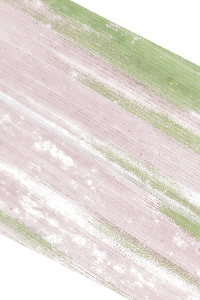

In [ ]:
cv2_imshow(CMYK_image)

In [ ]:
cbcr = np.empty_like(image) #membuat array unitialized yang ukurannya sama dengan image

r = image[:,:,2]
g = image[:,:,1]
b = image[:,:,0]

# Y
cbcr[:,:,0] = .299 * r + .587 * g + .114 * b
# Cb
cbcr[:,:,1] = 128 - .169 * r - .331 * g + .5 * b
# Cr
cbcr[:,:,2] = 128 + .5 * r - .419 * g - .081 * b

hasil_ycbcr= np.uint8(cbcr)


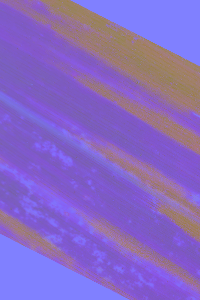

In [ ]:
cv2_imshow(hasil_ycbcr)

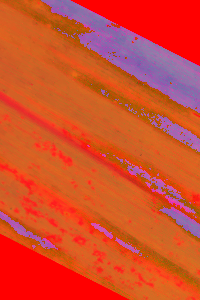

In [ ]:
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_img)

In [ ]:
hsv = np.empty_like(image) #membuat array unitialized yang ukurannya sama dengan image
r = image[:,:,2]
g = image[:,:,1]
b = image[:,:,0]
r, g, b = r/255.0, g/255.0, b/255.0
mx = max(r.all(), g.all(), b.all())
mn = min(r.all(), g.all(), b.all())
mx = mx.astype(np.float32)
mn = mn.astype(np.float32)
df = mx-mn
if mx == mn:
    hsv[:,:,0] = 0
elif mx == r:
    hsv[:,:,0] = (60 * ((g-b)/df) + 360) % 360
elif mx == g:
    hsv[:,:,0] = (60 * ((b-r)/df) + 120) % 360
elif mx == b:
    hsv[:,:,0] = (60 * ((r-g)/df) + 240) % 360
if mx == 0:
    hsv[:,:,1] = 0
else:
    hsv[:,:,1] = (df/mx)*100
hsv[:,:,2] = mx*100
hsv_image= np.uint8(hsv)

In [ ]:
def rgb(image_file,x,y):
  global B
  global G
  global R
  B,G,R = image_file[x,y]
  return B,G,R

In [ ]:
def cmyk(image_file,x,y):
  global C
  global M
  global Y
  global K
  img = image_file.astype(np.float64)/255.
  K = 1 - np.max(img, axis=2)
  C = (1-img[...,2] - K)/(1-K) #(1-R-K)/(1-k)
  M = (1-img[...,1] - K)/(1-K) # (1-G-K)/(1-k)
  Y = (1-img[...,0] - K)/(1-K) #(1-B-K)/(1-k)

  CMYK_image= (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)
  C,M,Y,K = CMYK_image[x,y]
  return C,M,Y,K

In [ ]:
def ycbcr(image_file,x,y):
  global Y
  global Cb
  global Cr

  cbcr = np.empty_like(image_file) #membuat array unitialized yang ukurannya sama dengan image

  r = image_file[:,:,2]
  g = image_file[:,:,1]
  b = image_file[:,:,0]
  
  # Y
  cbcr[:,:,0] = .299 * r + .587 * g + .114 * b
  # Cb
  cbcr[:,:,1] = 128 - .169 * r - .331 * g + .5 * b
  # Cr
  cbcr[:,:,2] = 128 + .5 * r - .419 * g - .081 * b

  ycbcr_image= np.uint8(cbcr)
  Y,Cb,Cr = ycbcr_image[x,y]
  return Y,Cb,Cr

In [ ]:
def rgb_to_hsv(image_file, x,y):
  global h
  global s
  global v
  hsv = np.empty_like(image)
  r = image[:,:,2]
  g = image[:,:,1]
  b = image[:,:,0]
  r, g, b = r/255.0, g/255.0, b/255.0
  mx = max(r.all(), g.all(), b.all())
  mn = min(r.all(), g.all(), b.all())
  mx = mx.astype(np.float32)
  mn = mn.astype(np.float32)
  df = mx-mn
  if mx.all() == mn.all():
      hsv[:,:,0] = 0
  elif mx.all() == r.all():
      hsv[:,:,0] = (60 * ((g-b)/df) + 360) % 360
  elif mx.all() == g.all():
      hsv[:,:,0] = (60 * ((b-r)/df) + 120) % 360
  elif mx.all() == b.all():
      hsv[:,:,0] = (60 * ((r-g)/df) + 240) % 360
  if mx.all() == 0:
      hsv[:,:,1] = 0
  else:
      hsv[:,:,1] = (df/mx)*100
  hsv[:,:,2] = mx*100
  hsv_image= np.uint8(hsv)
  h,s,v = hsv_image[x,y]
  return h, s, v

In [ ]:
rgb_to_hsv(image, 100,100)

(0, 0, 100)

In [ ]:
from skimage.feature import greycomatrix, greycoprops
def calc_glcm_all_agls(img,props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    # feature.append(label) 
    
    return feature

In [ ]:
#path untuk load 1000 image
images_path = glob.glob('drive/MyDrive/Jagung All/Bulai_1000/*.png')

In [ ]:
imgs = [] #list image matrix 
# labels = []
# descs = []

for image in images_path:
    img = cv2.imread(image)   
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    h, w = gray.shape
    ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
    crop = gray[ymin:ymax, xmin:xmax]       
    resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)
            
    imgs.append(resize)
    # labels.append(normalize_label(os.path.splitext(filename)[0]))
    # descs.append(normalize_desc(folder, sub_folder))
            
            # print_progress(i, len_sub_folder, folder, sub_folder, filename)

In [ ]:
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img in imgs: 
    glcm_all_agls.append(
            calc_glcm_all_agls(img,   
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)

In [ ]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

glcm_df.head(5)

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
0,13.078720,10.354864,4.472844,12.242868,0.742081,0.834802,0.962736,0.771772,0.089693,0.114659,...,44.863149,278.605132,0.000495,0.000582,0.001140,0.000515,0.022244,0.024117,0.033767,0.022701
1,12.508291,11.689806,6.849069,12.098670,0.700922,0.738918,0.883777,0.720812,0.085659,0.091244,...,109.389103,264.972195,0.000410,0.000427,0.000798,0.000418,0.020242,0.020664,0.028243,0.020436
2,3.397804,2.701241,2.364813,3.516020,0.869141,0.912828,0.931009,0.858143,0.260727,0.317611,...,10.569621,21.606379,0.002599,0.003213,0.003672,0.002547,0.050981,0.056682,0.060600,0.050468
3,21.216356,19.915795,11.782605,21.007253,0.707950,0.739402,0.903152,0.713034,0.048504,0.052728,...,239.857020,711.055489,0.000111,0.000116,0.000177,0.000112,0.010522,0.010771,0.013287,0.010588
4,10.664360,9.239570,7.290477,10.891476,0.656233,0.722442,0.790887,0.639389,0.100188,0.116552,...,119.717025,208.780124,0.000591,0.000654,0.000828,0.000586,0.024310,0.025579,0.028768,0.024207


In [ ]:
# determining the name of the file
file_name = 'GLCM.xlsx'
  
# saving the excel
glcm_df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
# Inisiasi Writer Excel
writer = pd.ExcelWriter('Hasil_warna.xlsx')

In [ ]:
#1000 image

index = 0
img_ke = 1
tabel_hasil = []
kolom = ["Image","R", "G", "B", "C", "M","Y","K", "Y", "Cb", "Cr","h","s","v"]
tabel_hasil.append(kolom)
for image in images_path:
  image = cv2.imread(image)
  image = cv2.resize(image,(200,300))
  rgb(image,100,100)
  cmyk(image,100,100)
  ycbcr(image,100,100)
  rgb_to_hsv(image, 100,100)
  tabel_baris = [
      img_ke,
      R,
      G,
      B,
      C,
      M,
      Y,
      K,
      Y,
      Cb,
      Cr,
      h,
      s,
      v

      
  ]
  index+=1
  img_ke+=1
  tabel_hasil.append(tabel_baris)

tabel_hasil = pd.DataFrame(tabel_hasil)
tabel_hasil.to_excel(writer, sheet_name="RGB-CMYK")
writer.save()